# Trabalho 2
Trabalho 2 de Machine Learning: Artigo sobre Classificação

## Data prep

In [421]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt



In [422]:

data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [423]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d (%5.2f%%)' % (col,data[col].isna().sum(), data[col].isna().sum()/len(data)*100))

Number of instances = 13580
Number of attributes = 21
Number of missing values:
	Suburb: 0 ( 0.00%)
	Address: 0 ( 0.00%)
	Rooms: 0 ( 0.00%)
	Type: 0 ( 0.00%)
	Price: 0 ( 0.00%)
	Method: 0 ( 0.00%)
	SellerG: 0 ( 0.00%)
	Date: 0 ( 0.00%)
	Distance: 0 ( 0.00%)
	Postcode: 0 ( 0.00%)
	Bedroom2: 0 ( 0.00%)
	Bathroom: 0 ( 0.00%)
	Car: 62 ( 0.46%)
	Landsize: 0 ( 0.00%)
	BuildingArea: 6450 (47.50%)
	YearBuilt: 5375 (39.58%)
	CouncilArea: 1369 (10.08%)
	Lattitude: 0 ( 0.00%)
	Longtitude: 0 ( 0.00%)
	Regionname: 0 ( 0.00%)
	Propertycount: 0 ( 0.00%)


In [424]:
print(data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [425]:
#Limpeza dos dados
data.dropna(inplace=True)

data.drop(['Address', 'Price', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude'],inplace=True, axis=1)

In [426]:
# Criando as classes de preço
data['PriceRange'] = pd.cut(data['Price'],[0,500000,1000000,1500000,np.inf],labels=['Baixo','Médio','Alto','Altíssimo'])

In [427]:

# NOTA: não é algo bom de se fazer, pois os algoritmos podem retirar informações erradas sobre isso
#       ao usar dummies, aumentamos em 1% a acurácia do método RandomForest

# Convertendo atributos nominais para numéricos
# data['Type'] = data['Type'].astype('category')
# data['Type'] = data['Type'].cat.codes

# data['Regionname'] = data['Regionname'].astype('category')
# data['Regionname'] = data['Regionname'].cat.codes

# data['Suburb'] = data['Suburb'].astype('category')
# data['Suburb'] = data['Suburb'].cat.codes

# data.head()

In [428]:
# Set variables for the targets and features
y = data['PriceRange']
#NOTA: usando X com dummies para lidar com atributos nominais
X = pd.get_dummies(data.drop(['PriceRange', 'Price'], axis=1))

## Holdout

In [429]:
# Holdout
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=7)

In [430]:


# Create the classifier and fit it to our training data
model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(train_X, train_y)



RandomForestClassifier(random_state=7)

In [431]:


# Predict classes given the validation features
pred_y = model.predict(test_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)



Accuracy:  0.7520981278244029


Confusion matrix:
[[218  44   0  93]
 [ 55 218   0   9]
 [  0   1 121  81]
 [ 64   5  32 608]]

Normalized confusion matrix:
[[0.61408451 0.12394366 0.         0.26197183]
 [0.19503546 0.77304965 0.         0.03191489]
 [0.         0.00492611 0.59605911 0.39901478]
 [0.09026798 0.00705219 0.04513399 0.85754584]]


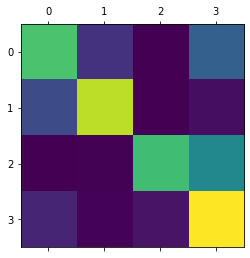

In [432]:

# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(test_y, pred_y)
print(f"Confusion matrix:\n{confusion}")

normalizedConfusion = np.array([])

# Normalizing by the true label counts to get rates
for row in confusion:
    normalizedConfusion = np.append( normalizedConfusion, row/row.sum())

normalizedConfusion = np.reshape(normalizedConfusion,(4,4))


print(f"\nNormalized confusion matrix:")
print(normalizedConfusion)

plt.matshow(normalizedConfusion)





## K-Nearest Neighbors

Text(0, 0.5, 'Mean Error')

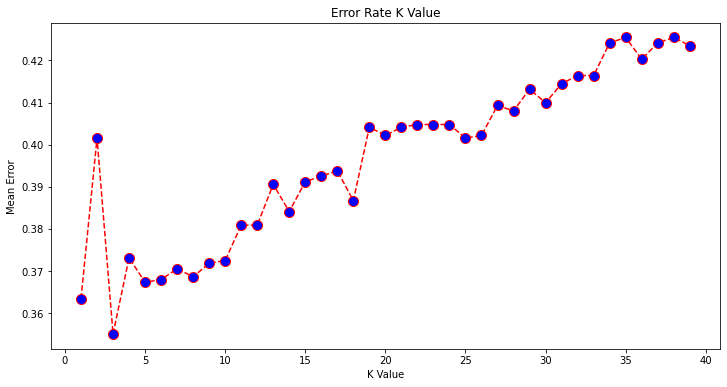

In [433]:
# Descobrindo melhor K value
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    pred_i = knn.predict(test_X)
    error.append(np.mean(pred_i != test_y))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [156]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.644932214331827


In [434]:
pred_y

array(['Médio', 'Baixo', 'Alto', ..., 'Médio', 'Alto', 'Médio'],
      dtype=object)

In [435]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[192  44   4 115]
 [ 71 177   3  31]
 [ 13   2 104  84]
 [ 99  23  80 507]]
              precision    recall  f1-score   support

        Alto       0.51      0.54      0.53       355
   Altíssimo       0.72      0.63      0.67       282
       Baixo       0.54      0.51      0.53       203
       Médio       0.69      0.72      0.70       709

    accuracy                           0.63      1549
   macro avg       0.62      0.60      0.61      1549
weighted avg       0.63      0.63      0.63      1549



In [436]:
y_test

6972        Baixo
4670        Baixo
2758    Altíssimo
6605         Alto
984         Médio
          ...    
5447        Médio
3117        Baixo
6792    Altíssimo
3213    Altíssimo
4603        Médio
Name: PriceRange, Length: 1240, dtype: category
Categories (4, object): ['Baixo' < 'Médio' < 'Alto' < 'Altíssimo']

In [437]:
y_pred

array(['Alto', 'Alto', 'Altíssimo', ..., 'Médio', 'Altíssimo', 'Baixo'],
      dtype='<U9')

## Naive Bayes

In [438]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train_X, train_y)
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1240 points : 493


In [439]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[160  80  19  18]
 [ 30 203   0   0]
 [  1   3 134  21]
 [126  29 166 250]]
              precision    recall  f1-score   support

        Alto       0.50      0.58      0.54       277
   Altíssimo       0.64      0.87      0.74       233
       Baixo       0.42      0.84      0.56       159
       Médio       0.87      0.44      0.58       571

    accuracy                           0.60      1240
   macro avg       0.61      0.68      0.61      1240
weighted avg       0.69      0.60      0.60      1240



## Multilayer Perceptron

In [442]:
# MLP
# Adaptado de https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [443]:
# define baseline model
def baseline_model():
    input_size = len(X.columns)

    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=input_size, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [444]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [445]:
kfold = KFold(n_splits=10, shuffle=True)

In [446]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 65.90% (10.67%)


In [447]:
#Kappa 
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

-0.015868093244430836

## Curva ROC e AUC